## Demonstration of Univariate Linear Regression

This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).

This notebook demonstrates the application of univariate linear regression to estimate the parameters of a one-dimensional predictor model from a set of examples.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Generate Dataset

In the following, a synthetic dataset with $N$ examples is generated by implementing a simple linear relationship and additive noise.

In [2]:
N = 200  # total number of examples
alpha = 1.2  # true intercept
theta = .1  # true slope

np.random.seed(123)
X = np.random.uniform(low=-5, high=10, size=N)
Y = alpha + theta * X + .1 * np.random.normal(size=N)

The data points are plotted in order to investigate the structure of the dataset. The linear relation ship becomes clearly visible.

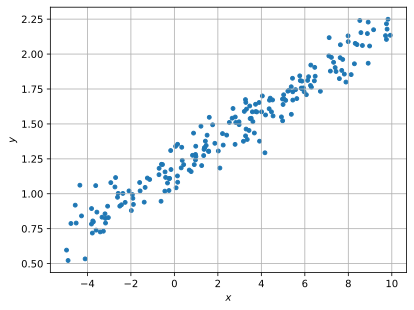

In [3]:
def plot_data(X, Y, ylabel=r'$y$'):
    plt.scatter(X, Y, s=15, label=r'examples $(x_n, y_n)$')
    plt.xlabel(r'$x$')
    plt.ylabel(ylabel)
    plt.grid()
    
plot_data(X, Y)

### Estimate Parameters of Linear Regression

The parameters of the linear model are estimated by performing a linear regression. First the data matrix is extended in order to incorporate the intercept in the model.

In [4]:
Xt = np.concatenate((np.ones((len(X),1)), X[:,np.newaxis]), axis=1)
theta_hat = np.linalg.inv(Xt.T @ Xt) @ Xt.T @ Y

Comparison of the estimated and true parameters reveals that the regression was able to determine the parameters with a quite high accuracy 

In [5]:
print('Estimated/true intercept: {0:.3f} / {1:.3f}'.format(theta_hat[0], alpha))
print('Estimated/true slope: {0:.3f} / {1:.3f}'.format(theta_hat[1], theta))

Estimated/true intercept: 1.188 / 1.200
Estimated/true slope: 0.100 / 0.100


A common visualization of linear regression is to show the data points together with the estimated line predictor illustrated by a (regression) line. Note, points on the regression line constitute the output $\hat{y}$ of the linear predictor for a given $x$.

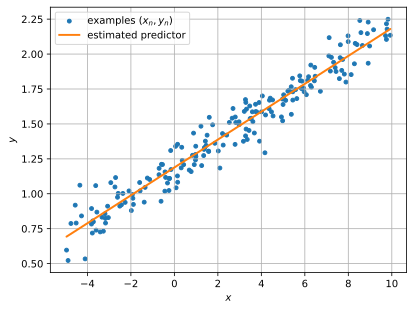

In [6]:
plot_data(X, Y)

Y_hat = Xt @ theta_hat
plt.plot(X, Y_hat, color='C1', linewidth=2, label='estimated predictor')
plt.legend()

### Evaluation

Various measures are used to evaluate the performance of linear regression. The most common ones are demonstrated in the following.

#### Residuals Plot

The statistical properties of the residual error $e = y_n - \hat{y}_n$ provide insights into the validity of the linear model and if the underlying assumptions are met. Lets first plot the residual error, together with its mean $\mu_e$ and standard deviation $\sigma_e$. Inspection of the plot reveals that the error is mean free and the spread of the values is approximately constant over the feature $x$. 

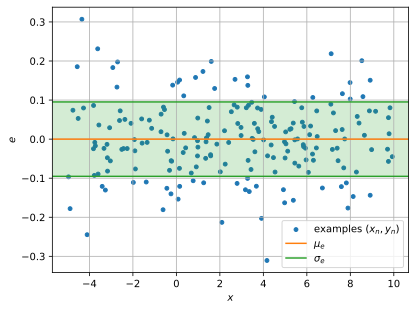

In [7]:
e = Y - Y_hat
mu_e = np.mean(e)
std_e = np.std(e)

plot_data(X, e, ylabel=r'$e$')
plt.axhline(y=mu_e, color='C1', label=r'$\mu_e$')
plt.axhline(y=std_e, color='C2', label=r'$\sigma_e$')
plt.axhline(y=-std_e, color='C2')
plt.axhspan(-std_e, std_e, facecolor='C2', alpha=0.2)
plt.legend()

#### Performance Metrics

The [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) $R^2$ is a common measure for the goodness-of-fit of an estimated model. Is bases on the total sum-of-squares and the residual sum-of-squares.

In [8]:
TSS = np.sum((Y - np.mean(Y))**2)
RSS = np.sum((Y-Y_hat)**2)
Rs = 1 - RSS/TSS

print('Total sum-of-squares (TSS): \t {0:.5f}'.format(TSS))
print('Residual sum-of-squares (RSS): \t {0:.5f}'.format(RSS))
print('Coefficient of determination: \t {0:.5f}'.format(Rs))

Total sum-of-squares (TSS): 	 33.48075
Residual sum-of-squares (RSS): 	 1.81328
Coefficient of determination: 	 0.94584


**Copyright**

This notebook is provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources).
The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/)
, the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: Sascha Spors, Data driven audio signal processing - Lecture supplementals.